# TEL354 - Minería de Datos

# Taller 1 - Análisis Urbano y Socioeconómico mediante Técnicas de Agrupamiento Avanzadas

Nombre:

# Preparación del Entorno

# Instalación de Dependencias

In [47]:
# Instalar las dependencias necesarias
# pip install geopandas scikit-learn matplotlib seaborn umap-learn hdbscan

# Cargar librerías de trabajo

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librerías para clustering y reducción de dimensionalidad
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

# Parte 1: Carga y Exploración de Datos

En esta primera parte del taller, deberás trabajar con datos geoespaciales de las comunas de Santiago y datos socioeconómicos asociados. Realizarás la carga de archivos, exploración inicial y visualización básica de los datos.

# 1.1 Geodatos Regionales

**Objetivo:** Cargar un archivo shapefile que contiene la división comunal de Chile y examinar sus primeros registros.
Instrucciones:

- Utiliza la biblioteca GeoPandas (gpd) para cargar el archivo `division_comunal.shp`.
- Almacena los datos en un DataFrame llamado `df`.
- Muestra las primeras filas del DataFrame para explorar su estructura.

**Resultado esperado:** Un DataFrame que muestre información geoespacial de las comunas, incluyendo geometrías y atributos como nombres de provincias y comunas.

In [49]:
# Utiliza la biblioteca GeoPandas (gpd) para cargar el archivo `division_comunal.shp`.
# Almacena los datos en un DataFrame llamado `df`.
df = gpd.read_file("division_comunal.shp")

# Muestra las primeras filas del DataFrame para explorar su estructura.
df.head()

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area,geometry
0,Región de La Araucanía,Malleco,Ercilla,170675.595438,48,14,9204,170675.595706,4.979025e+08,"POLYGON ((190393.22 5794527.366, 190474.419 57..."
1,Región de La Araucanía,Malleco,Lonquimay,346907.195437,49,14,9205,346907.195899,3.932854e+09,"POLYGON ((294265.593 5781748.87, 294327.827 57..."
2,Región de La Araucanía,Malleco,Los Sauces,169844.122286,48,14,9206,169844.122239,8.519730e+08,"POLYGON ((155495.103 5804765.81, 155518.319 58..."
3,Región de La Araucanía,Malleco,Lumaco,227705.219204,48,14,9207,227705.218806,1.112643e+09,"POLYGON ((159561.53 5778741.661, 159745.162 57..."
4,Región de La Araucanía,Malleco,Purén,137030.480474,48,14,9208,137030.480353,4.654760e+08,"POLYGON ((145272.593 5804247.707, 145347.984 5..."


# 1.2 Geodatos de Santiago

**Objetivo:** Filtrar los datos para obtener solo las comunas de Santiago y convertirlos al sistema de coordenadas WGS84.
Instrucciones:

- A partir del DataFrame cargado anteriormente, filtra las filas donde el nombre de la provincia sea "Santiago".
- Convierte las geometrías al sistema de coordenadas WGS84 (EPSG:4326).
- Almacena el resultado en una variable llamada `df_stgo`.
- Muestra las primeras filas del DataFrame filtrado.

**Resultado esperado:** Un DataFrame que contiene únicamente las comunas de Santiago con sus geometrías en coordenadas WGS84.

In [50]:
# A partir del DataFrame cargado anteriormente, filtra las filas donde el nombre de la provincia sea "Santiago".
df_stgo = df[df['NOM_PROV'] == 'Santiago']

# Convierte las geometrías al sistema de coordenadas WGS84 (EPSG:4326).
# Almacena el resultado en una variable llamada `df_stgo`.
df_stgo = df_stgo.to_crs(epsg=4326)

# Muestra las primeras filas del DataFrame filtrado.
df_stgo.head()

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area,geometry
177,Región Metropolitana de Santiago,Santiago,Independencia,11488.695747,19,7,1310,11718.687086,7.514746e+06,"POLYGON ((-70.6573 -33.40479, -70.65729 -33.40..."
178,Región Metropolitana de Santiago,Santiago,La Florida,49696.426793,26,8,1311,49621.402175,7.103733e+07,"POLYGON ((-70.43946 -33.49206, -70.43825 -33.4..."
179,Región Metropolitana de Santiago,Santiago,Lo Barnechea,149539.074262,23,8,1311,149865.511039,1.024735e+09,"POLYGON ((-70.47724 -33.3695, -70.47593 -33.36..."
180,Región Metropolitana de Santiago,Santiago,Lo Espejo,11405.976039,28,8,1311,11389.045242,8.181655e+06,"POLYGON ((-70.69411 -33.50243, -70.69268 -33.5..."
181,Región Metropolitana de Santiago,Santiago,Lo Prado,10795.433316,18,7,1311,10691.672491,6.535088e+06,"POLYGON ((-70.70559 -33.45716, -70.70621 -33.4..."


# 1.3 Visualización del Mapa Base de Santiago

**Objetivo:** Crear una visualización simple del mapa de las comunas de Santiago.

**Instrucciones:**

- Crea una figura usando `plt.figure()`.
- Utiliza el método `plot()` del DataFrame `df_stgo` para dibujar el mapa.
- Añade un título adecuado.
- Elimina los ejes de la visualización.

**Resultado esperado:** Un mapa que muestre los contornos de las comunas de Santiago.

<Figure size 800x600 with 0 Axes>

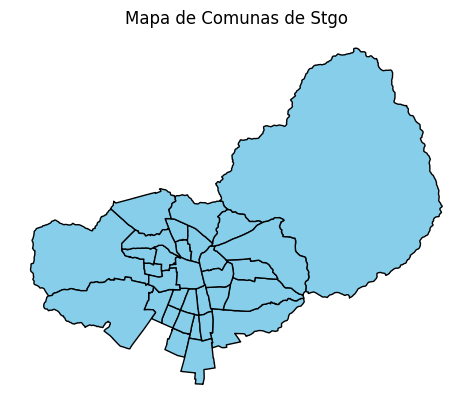

In [51]:
# Crea una figura usando `plt.figure()`.
plt.figure(figsize=(8, 6))

# Utiliza el método `plot()` del DataFrame `df_stgo` para dibujar el mapa.
df_stgo.plot(edgecolor='black', facecolor='white', color='skyblue')

# Añade un título adecuado.
plt.title("Mapa de Comunas de Stgo")

# Elimina los ejes de la visualización.
plt.axis('off')

# Mostrar Mapa
plt.show()

# 1.4 Datos Urbanos de Santiago

**Objetivo:** Cargar y explorar un conjunto de datos sobre barrios de Santiago.

**Instrucciones:**

- Utiliza pandas para cargar el archivo 'barrio.csv' y almacenarlo en un DataFrame llamado `df_barrio`.
- Muestra las primeras filas del DataFrame para examinar su estructura.
- Imprime un resumen que incluya:

    - El número total de registros.
    - El número de características (columnas).
    - La lista de nombres de columnas disponibles.


**Resultado esperado:** Información sobre la estructura del dataset de barrios y estadísticas resumidas de sus variables numéricas.

In [52]:
# Utiliza pandas para cargar el archivo 'barrio.csv' y almacenarlo en un DataFrame llamado `df_barrio`.
df_barrio = pd.read_csv('barrio.csv')

# Muestra las primeras filas del DataFrame para examinar su estructura.
df_barrio.head(10)

,comuna,longitud,latitud,nse
0,SAN RAMÓN,-70.647362,-33.552055,5.668529
1,CERRILLOS,-70.705783,-33.516205,75.181237
2,MAIPÚ,-70.795553,-33.519108,44.076450
3,RENCA,-70.743439,-33.404738,20.861773
4,MACUL,-70.589802,-33.487435,59.537313
5,LAS CONDES,-70.576622,-33.420994,96.406083
6,MAIPÚ,-70.783399,-33.510187,17.957286
7,ESTACIÓN CENTRAL,-70.689466,-33.472215,12.390661
8,MAIPÚ,-70.783473,-33.532184,44.234741
9,SANTIAGO,-70.647096,-33.436234,98.012894


In [53]:
filas, columnas = df_barrio.shape

# El número total de registros.
print("Registros = ", filas)

# El número de características (columnas).
print("Columnas = ", columnas)

# La lista de nombres de columnas disponibles.
print("\nNombres de Columnas: ")
df_barrio.columns.tolist()

Registros =  5000
Columnas =  4

Nombres de Columnas: 


['comuna', 'longitud', 'latitud', 'nse']

# 1.5 Análisis de Nivel Socioeconómico (NSE)

**Objetivo:** Analizar la distribución del nivel socioeconómico en los barrios de Santiago.

**Instrucciones:**

- Crea una figura.
- Generar un histograma de la columna 'nse' con una estimación de densidad.
- Añade un título adecuado y etiqueta los ejes.
- Agrega una cuadrícula.
- Muestra la visualización.

**Resultado esperado:** Un histograma que muestre cómo se distribuye el nivel socioeconómico entre los barrios de Santiago.

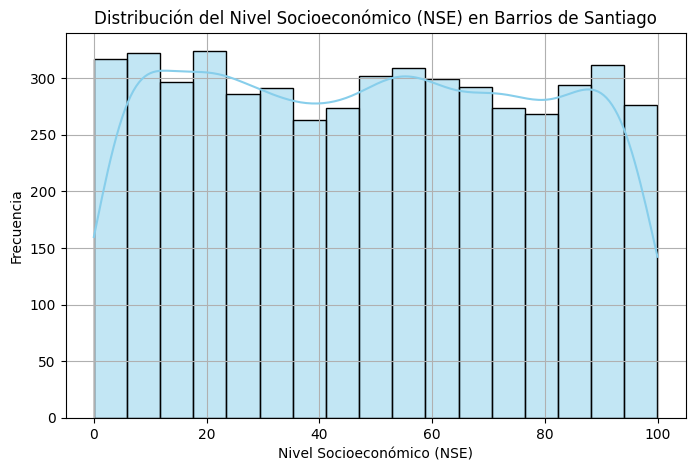

In [54]:
# Crea una figura.
plt.figure(figsize=(8, 5))

# Generar un histograma de la columna 'nse' con una estimación de densidad.
sns.histplot(df_barrio['nse'], kde=True, color='skyblue', edgecolor='black')

# Añade un título adecuado y etiqueta los ejes.
plt.title("Distribución del Nivel Socioeconómico (NSE) en Barrios de Santiago")
plt.xlabel("Nivel Socioeconómico (NSE)")
plt.ylabel("Frecuencia")

# Agrega una cuadrícula.
plt.grid(True)

# Muestra la visualización.
plt.show()

# 1.6 Visualización Geoespacial de NSE

**Objetivo:** Crear una visualización que combine el mapa de Santiago con la información de nivel socioeconómico de los barrios.

**Instrucciones:**

- Crea un mapa base usando las comunas de Santiago (`df_stgo`) con un color de relleno y contorno adecuado.
- Sobre este mapa, utiliza unn scatterplot para representar cada barrio según sus coordenadas de longitud y latitud del DataFrame `df_barrio`.
- Codifica el nivel socioeconómico (columna 'nse') mediante colores usando un mapa de colores adecuado.
- Añade una barra de colores que muestre la escala del nivel socioeconómico.
- Agrega un título adecuado y elimina los ejes de la visualización.

**Resultado esperado:** Un mapa de Santiago donde los barrios están representados como puntos cuyo color refleja su nivel socioeconómico, permitiendo identificar patrones espaciales de segregación socioeconómica.

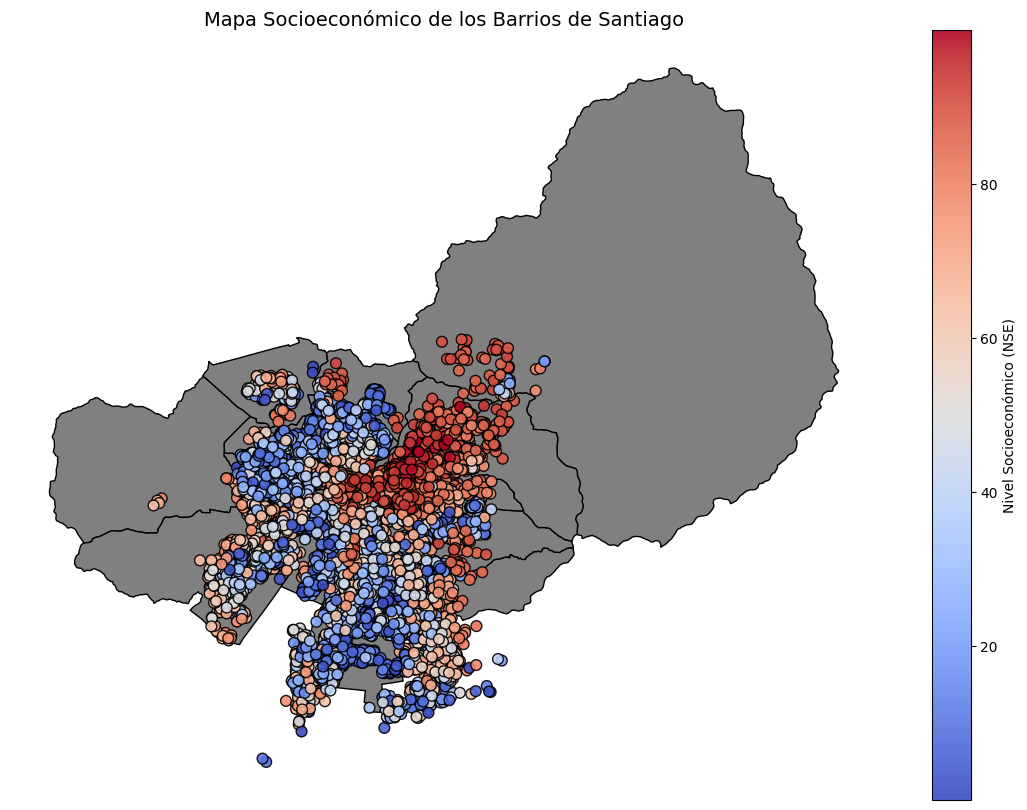

In [55]:
# Crea un mapa base usando las comunas de Santiago (`df_stgo`) con un color de relleno y contorno adecuado.
fig, ax = plt.subplots(figsize=(14, 10))
df_stgo.plot(ax=ax, color='gray', edgecolor='black')

# Sobre este mapa, utiliza unn scatterplot para representar cada barrio según sus coordenadas de longitud y latitud del DataFrame `df_barrio`.
# Codifica el nivel socioeconómico (columna 'nse') mediante colores usando un mapa de colores adecuado.
scatter = ax.scatter(
    df_barrio['longitud'], df_barrio['latitud'],
    c=df_barrio['nse'],
    cmap='coolwarm',
    edgecolor='black',
    s=60,
    alpha=0.9
)

#Añade una barra de colores que muestre la escala del nivel socioeconómico.
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Nivel Socioeconómico (NSE)")

# Agrega un título adecuado y elimina los ejes de visualización
ax.set_title("Mapa Socioeconómico de los Barrios de Santiago", fontsize=14)
ax.axis('off')

# Mostrar Mapa
plt.show()


# Parte 2: Preprocesamiento y Transformación de Datos

**Objetivo**
En esta segunda parte del taller, realizarás el preprocesamiento y la transformación de los datos para prepararlos para un análisis de clustering. El propósito general es analizar la estructura socioeconómica y urbana de Santiago mediante técnicas avanzadas de clustering y visualización geoespacial, comparando diferentes enfoques metodológicos y evaluando la calidad de los agrupamientos resultantes.

**Contexto**
Antes de comenzar, vamos a asumir que el nivel socioeconómico (NSE) en Chile se clasifica en siete categorías:

- AB: clase alta
- C1a: clase media acomodada
- C1b: clase media emergente
- C2: clase media típica
- C3: clase media baja
- D: clase media vulnerable
- E: pobres

Esta clasificación será relevante para interpretar los resultados de nuestro análisis.

# 2.1 Preprocesamiento de Datos

**Objetivo:** Preparar los datos para el análisis de clustering mediante la transformación de coordenadas, estandarización de variables y creación de conjuntos de datos agregados por comuna.

**Instrucciones:**


## Agregación por comuna:

- Agrupa los datos del DataFrame `df_barrio` por la columna 'comuna'.
- Calcula el promedio de 'longitud', 'latitud' y 'nse' para cada comuna.
- Reinicia el índice para obtener un DataFrame común.
- Almacena el resultado en un nuevo DataFrame llamado `comuna_grouped`.

## Estandarización de datos agrupados:

- Define una lista llamada `features` que contenga las columnas 'longitud', 'latitud' y 'nse'.
- Instancia un objeto `StandardScaler` de scikit-learn.
- Crea una copia del DataFrame `comuna_grouped` llamada `comuna_scaled`.
- Aplica el método `fit_transform` del escalador a las columnas especificadas en features.
- Convierte los nombres de comunas en `comuna_grouped` a mayúsculas.
- Crea una copia del DataFrame geoespacial `df_stgo` llamada `df_stgo_norm`.
- Convierte los nombres de comunas en la columna 'NOM_COM' de `df_stgo_norm` a mayúsculas.


## Verificación de datos procesados:

- Muestra las primeras filas del DataFrame `comuna_grouped`.

In [56]:
# Agrupa los datos del DataFrame `df_barrio` por la columna 'comuna'.
# Calcula el promedio de 'longitud', 'latitud' y 'nse' para cada comuna.
# Reinicia el índice para obtener un DataFrame común.
# Almacena el resultado en un nuevo DataFrame llamado `comuna_grouped`.
comuna_grouped = df_barrio.groupby('comuna')[['longitud', 'latitud', 'nse']].mean().reset_index()

In [57]:
# Define una lista llamada `features` que contenga las columnas 'longitud', 'latitud' y 'nse'.
features = ['longitud', 'latitud', 'nse']

#Instancia un objeto `StandardScaler` de scikit-learn.
scaler = StandardScaler()

# Crea una copia del DataFrame `comuna_grouped` llamada `comuna_scaled`.
comuna_scaled = comuna_grouped.copy()

# Aplica el método `fit_transform` del escalador a las columnas especificadas en features.
comuna_scaled[features] = scaler.fit_transform(comuna_scaled[features])

# Convierte los nombres de comunas en `comuna_grouped` a mayúsculas.
comuna_grouped['comuna'] = comuna_grouped['comuna'].str.upper()

# Crea una copia del DataFrame geoespacial `df_stgo` llamada `df_stgo_norm`.
df_stgo_norm = df_stgo.copy()

# Convierte los nombres de comunas en la columna 'NOM_COM' de `df_stgo_norm` a mayúsculas.
df_stgo_norm['NOM_COM'] = df_stgo_norm['NOM_COM'].str.upper()

In [58]:
# Muestra las primeras filas del DataFrame `comuna_grouped`.
comuna_grouped.head(10)

,comuna,longitud,latitud,nse
0,CERRILLOS,-70.721842,-33.496831,39.427586
1,CERRO NAVIA,-70.740294,-33.422983,20.584083
2,CONCHALÍ,-70.672558,-33.383486,29.991393
3,EL BOSQUE,-70.671911,-33.565505,26.968053
4,ESTACIÓN CENTRAL,-70.700680,-33.465468,32.830155
5,HUECHURABA,-70.645109,-33.367054,34.020231
6,INDEPENDENCIA,-70.663943,-33.416199,53.602546
7,LA CISTERNA,-70.663106,-33.530228,49.017431
8,LA FLORIDA,-70.587119,-33.538844,46.110115
9,LA GRANJA,-70.620587,-33.539887,31.848353


# Parte 3: Análisis de Clustering

En esta tercera parte del taller, aplicarás técnicas de clustering para identificar patrones socioeconómicos y espaciales en las comunas de Santiago. Determinarás el número óptimo de clusters, implementarás diferentes algoritmos de clustering y visualizarás los resultados en mapas.

# 3.1 Determinación del Número Óptimo de Clusters

**Objetivo:** Desarrollar una función que permita determinar el número ideal de clusters utilizando múltiples métricas de evaluación.

**Instrucciones:**

- Crea una función que reciba un DataFrame y un número máximo de clusters a evaluar.
- Dentro de la función, implementa tres métodos para evaluar el número óptimo de clusters:

- **Método del Codo (Elbow Method):**

    - Calcula la inercia (suma de cuadrados dentro del cluster) para diferentes valores de k.
    - Crea un gráfico de línea con marcadores que muestre la inercia en función del número de clusters.
    - Configura el título como "Método del Codo", etiqueta el eje X como "Número de clusters" y el eje Y como "Inercia".


- **Coeficiente de Silueta (Silhouette Coefficient):**

    - Calcula el puntaje de silueta para diferentes valores de k.
    - Crea un gráfico de línea con marcadores que muestre el puntaje de silueta en función del número de clusters.
    - Configura el título como "Coeficiente de Silueta", etiqueta el eje X como "Número de clusters" y el eje Y como "Puntaje de Silueta".


- **Índice Calinski-Harabasz:**

    - Calcula el puntaje Calinski-Harabasz para diferentes valores de k.
    - Crea un gráfico de línea con marcadores que muestre el puntaje CH en función del número de clusters.
    - Configura el título como "Índice Calinski-Harabasz", etiqueta el eje X como "Número de clusters" y el eje Y como "Puntaje CH".




- Organiza los tres gráficos en una fila usando subplots.
- Aplica la función creada al DataFrame `comuna_scaled`.

**Resultado esperado:** Tres gráficos que muestren diferentes métricas para evaluar el número óptimo de clusters. Basándote en estos resultados, deberás seleccionar el valor de k más adecuado para los análisis posteriores.

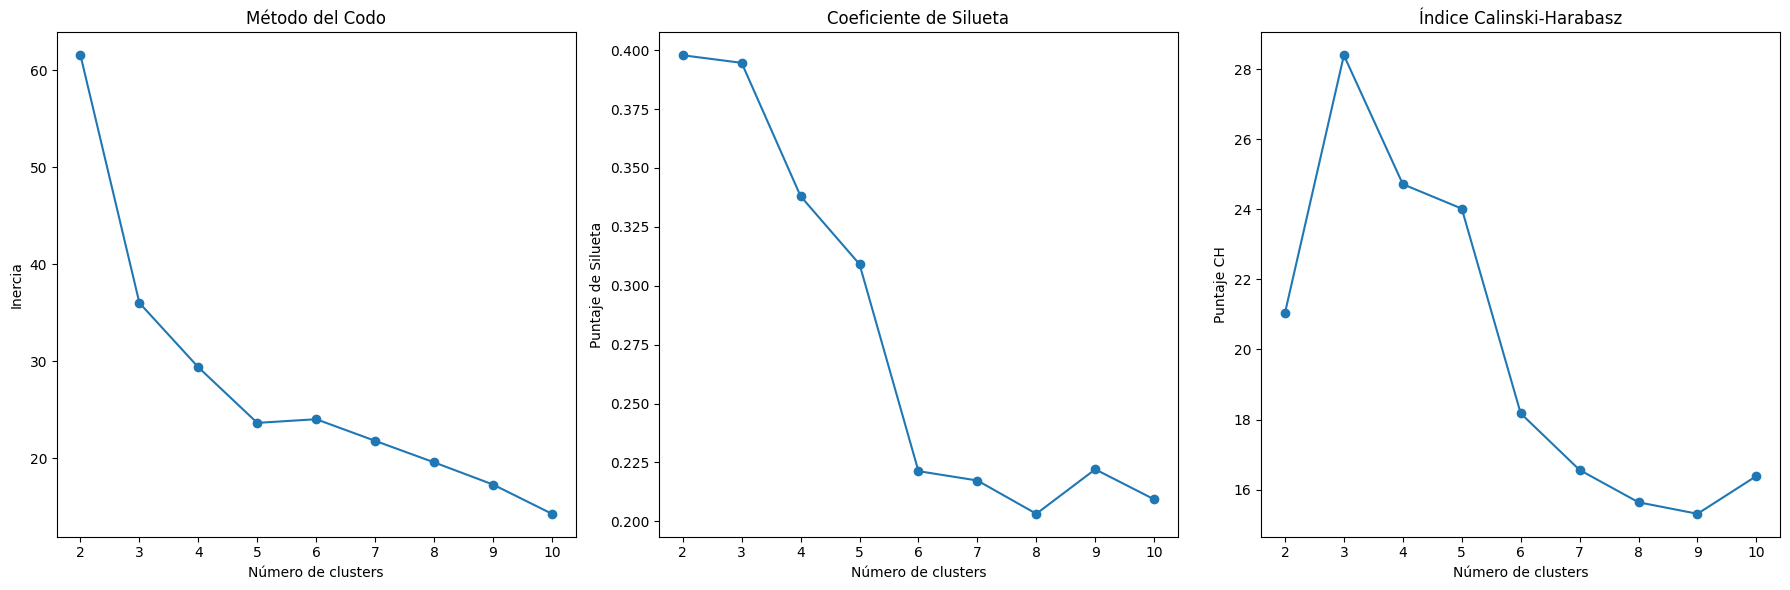

In [59]:
def determinar_numero_optimo_clusters(data, max_k):
    inertias = []
    silhouette_scores = []
    ch_scores = []

    # Calcular la inercia, coeficiente de silueta e índice Calinski-Harabasz para cada k
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)

        # Inercia (Método del Codo)
        inertias.append(kmeans.inertia_)

        # Coheficiente de Silueta (Silhouette Coefficient)
        silhouette_scores.append(silhouette_score(data, clusters))

        # Índice Calinski-Harabasz
        ch_scores.append(calinski_harabasz_score(data, clusters))

    # Crear subgráficos
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Método del Codo: Inercia vs Número de clusters
    axes[0].plot(range(2, max_k + 1), inertias, marker='o')
    axes[0].set_title("Método del Codo")
    axes[0].set_xlabel("Número de clusters")
    axes[0].set_ylabel("Inercia")

    # Coeficiente de Silueta vs Número de clusters
    axes[1].plot(range(2, max_k + 1), silhouette_scores, marker='o')
    axes[1].set_title("Coeficiente de Silueta")
    axes[1].set_xlabel("Número de clusters")
    axes[1].set_ylabel("Puntaje de Silueta")

    # Índice Calinski-Harabasz vs Número de clusters
    axes[2].plot(range(2, max_k + 1), ch_scores, marker='o')
    axes[2].set_title("Índice Calinski-Harabasz")
    axes[2].set_xlabel("Número de clusters")
    axes[2].set_ylabel("Puntaje CH")

    # Ajuste y presentación
    plt.tight_layout()
    plt.show()

# Aplicar la función a tu DataFrame
determinar_numero_optimo_clusters(comuna_scaled[features], 10)

# 3.2 Aplicación de Algoritmos de Clustering

**Objetivo:** Aplicar y comparar cuatro algoritmos de clustering diferentes a los datos de las comunas de Santiago.

**Instrucciones:**

## K-Means Clustering:

- Define el número óptimo de clusters basado en el análisis de la sección 3.1.
- Implementa el algoritmo K-Means con el número de clusters determinado.
- Almacena los resultados de la asignación de clusters en la columna 'kmeans_cluster' del DataFrame `comuna_scaled`.
- Transfiere los resultados al DataFrame `comuna_grouped`.


## Clustering Jerárquico (Agglomerative Clustering):

- Evalúa cuatro métodos de enlace (linkage): 'ward', 'complete', 'average', y 'single'.
- Para cada método, crea un objeto AgglomerativeClustering con el número óptimo de clusters.
- Calcula el puntaje de silueta para cada método.
- Genera dendrogramas para visualizar la estructura jerárquica resultante de cada método.
- Crea un gráfico de barras comparando los puntajes de silueta de los diferentes métodos.
- Identifica el mejor método de enlace basado en el puntaje de silueta más alto.
- Aplica el clustering jerárquico con el mejor método de enlace.
- Almacena los resultados en la columna 'agg_cluster' de los DataFrames `comuna_scaled` y `comuna_grouped`.


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

- Aplica DBSCAN con los parámetros que consideres más adecuados luego de realizar diferentes pruebas.
- Almacena los resultados en la columna 'dbscan_cluster' de los DataFrames `comuna_scaled` y `comuna_grouped`.


## GMM (Gaussian Mixture Models):

- Implementa un modelo GMM con el número óptimo de componentes.
- Almacena los resultados en la columna 'gmm_cluster' de los DataFrames `comuna_scaled` y `comuna_grouped`.


## Comparación Visual de Algoritmos:

- Crea una figura con cuatro subplots para comparar los resultados de los cuatro algoritmos.
- Para cada algoritmo, genera un gráfico de dispersión usando las coordenadas de longitud y latitud.
- Codifica los clusters mediante colores usando diferentes mapas de colores para cada algoritmo.
- Añade barras de color, títulos y etiquetas apropiadas.



**Resultado esperado:** Una comparación visual de cómo los diferentes algoritmos de clustering agrupan las comunas de Santiago, permitiendo identificar fortalezas y debilidades de cada enfoque.

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

# K-Means Clustering:

# Define el número óptimo de clusters basado en el análisis de la sección 3.1.
# Implementa el algoritmo K-Means con el número de clusters determinado.
# Almacena los resultados de la asignación de clusters en la columna 'kmeans_cluster' del DataFrame `comuna_scaled`.
# Transfiere los resultados al DataFrame `comuna_grouped`.
kmeans = KMeans(n_clusters=4, random_state=42)
comuna_scaled['kmeans_cluster'] = kmeans.fit_predict(comuna_scaled[features])
comuna_grouped['kmeans_cluster'] = comuna_scaled['kmeans_cluster']

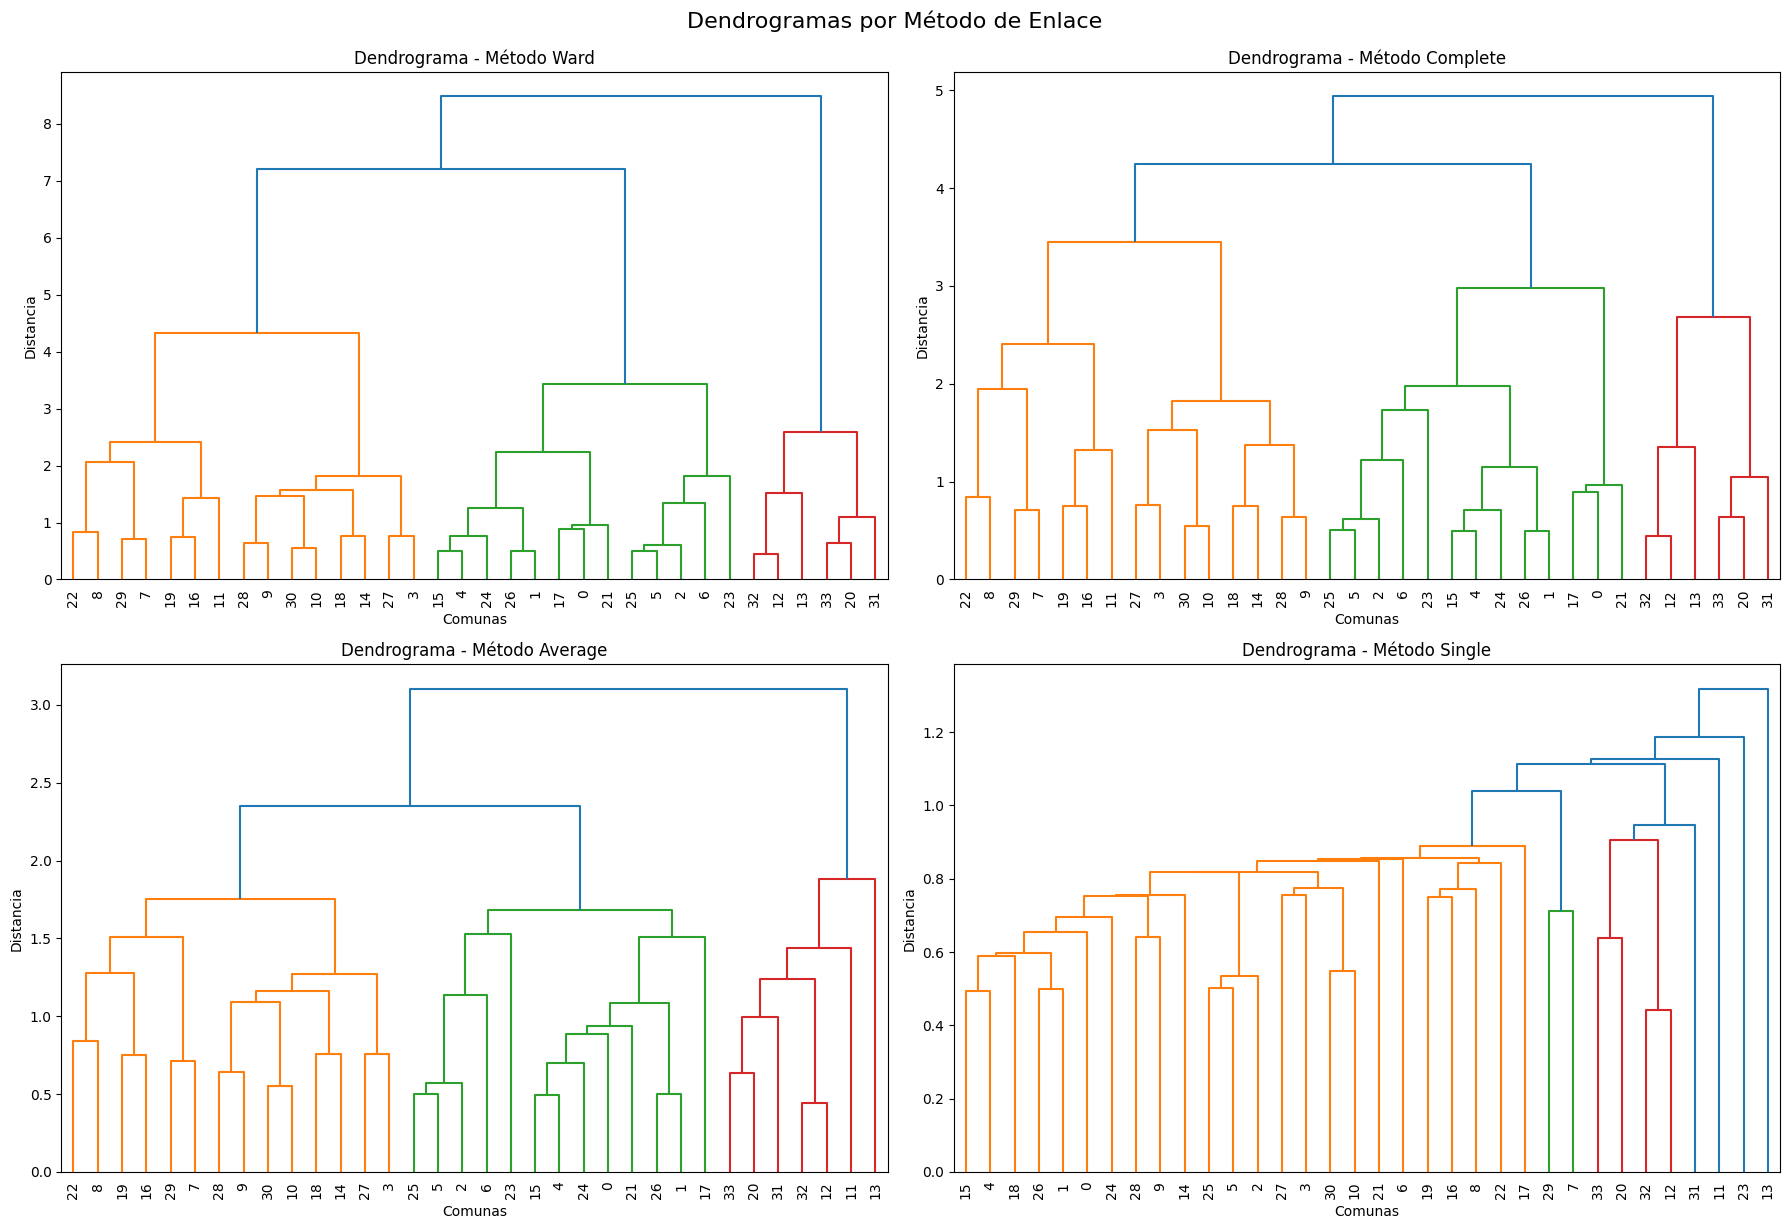

C:\Users\nelso\AppData\Local\Temp\ipykernel_8648\2769788847.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=linkage_methods, y=silhouette_scores, palette='Set2')


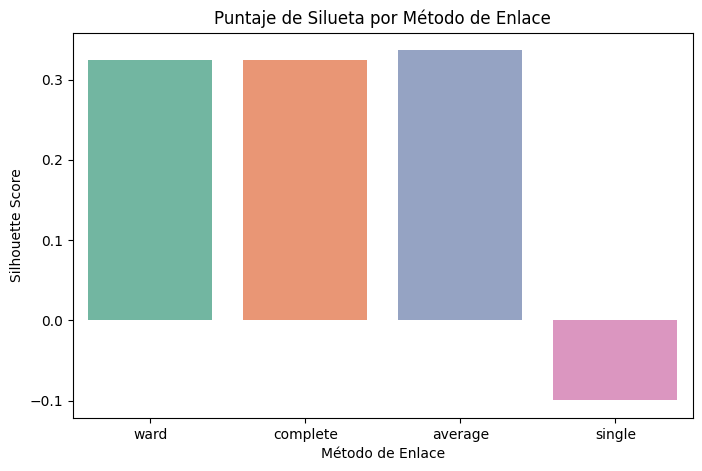

Mejor método de enlace: average


In [61]:
# Clustering Jerárquico (Agglomerative Clustering):
# Evalúa cuatro métodos de enlace (linkage): 'ward', 'complete', 'average', y 'single'.
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores = []

# Para cada método, crea un objeto AgglomerativeClustering con el número óptimo de clusters.
# Calcula el puntaje de silueta para cada método.
for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = model.fit_predict(comuna_scaled[features])
    score = silhouette_score(comuna_scaled[features], labels)
    silhouette_scores.append(score)

# Genera dendrogramas para visualizar la estructura jerárquica resultante de cada método.
plt.figure(figsize=(18, 12))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(comuna_scaled[features], method=method)
    dendrogram(Z,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               leaf_rotation=90,
               leaf_font_size=10)
    plt.title(f'Dendrograma - Método {method.capitalize()}')
    plt.xlabel('Comunas')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.suptitle('Dendrogramas por Método de Enlace', fontsize=16, y=1.02)
plt.show()

# Crea un gráfico de barras comparando los puntajes de silueta de los diferentes métodos.
plt.figure(figsize=(8, 5))
sns.barplot(x=linkage_methods, y=silhouette_scores, palette='Set2')
plt.title('Puntaje de Silueta por Método de Enlace')
plt.ylabel('Silhouette Score')
plt.xlabel('Método de Enlace')
plt.show()

# Identifica el mejor método de enlace basado en el puntaje de silueta más alto.
mejor_metodo = linkage_methods[np.argmax(silhouette_scores)]
print(f"Mejor método de enlace: {mejor_metodo}")

#  Aplica el clustering jerárquico con el mejor método de enlace.
# Almacena los resultados en la columna 'agg_cluster' de los DataFrames `comuna_scaled` y `comuna_grouped`.
jerarquico = AgglomerativeClustering(n_clusters=4, linkage=mejor_metodo)
comuna_scaled['agg_cluster'] = jerarquico.fit_predict(comuna_scaled[features])
comuna_grouped['agg_cluster'] = comuna_scaled['agg_cluster']

In [62]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
# Aplica DBSCAN con los parámetros que consideres más adecuados luego de realizar diferentes pruebas.
# Almacena los resultados en la columna 'dbscan_cluster' de los DataFrames `comuna_scaled` y `comuna_grouped`.
dbscan = DBSCAN(eps=1.5, min_samples=2)
comuna_scaled['dbscan_cluster'] = dbscan.fit_predict(comuna_scaled[features])
comuna_grouped['dbscan_cluster'] = comuna_scaled['dbscan_cluster']

In [63]:
# ## GMM (Gaussian Mixture Models):
# Implementa un modelo GMM con el número óptimo de componentes.
# Almacena los resultados en la columna 'gmm_cluster' de los DataFrames `comuna_scaled` y `comuna_grouped`.
gmm = GaussianMixture(n_components=4, random_state=42)
comuna_scaled['gmm_cluster'] = gmm.fit_predict(comuna_scaled[features])
comuna_grouped['gmm_cluster'] = comuna_scaled['gmm_cluster']

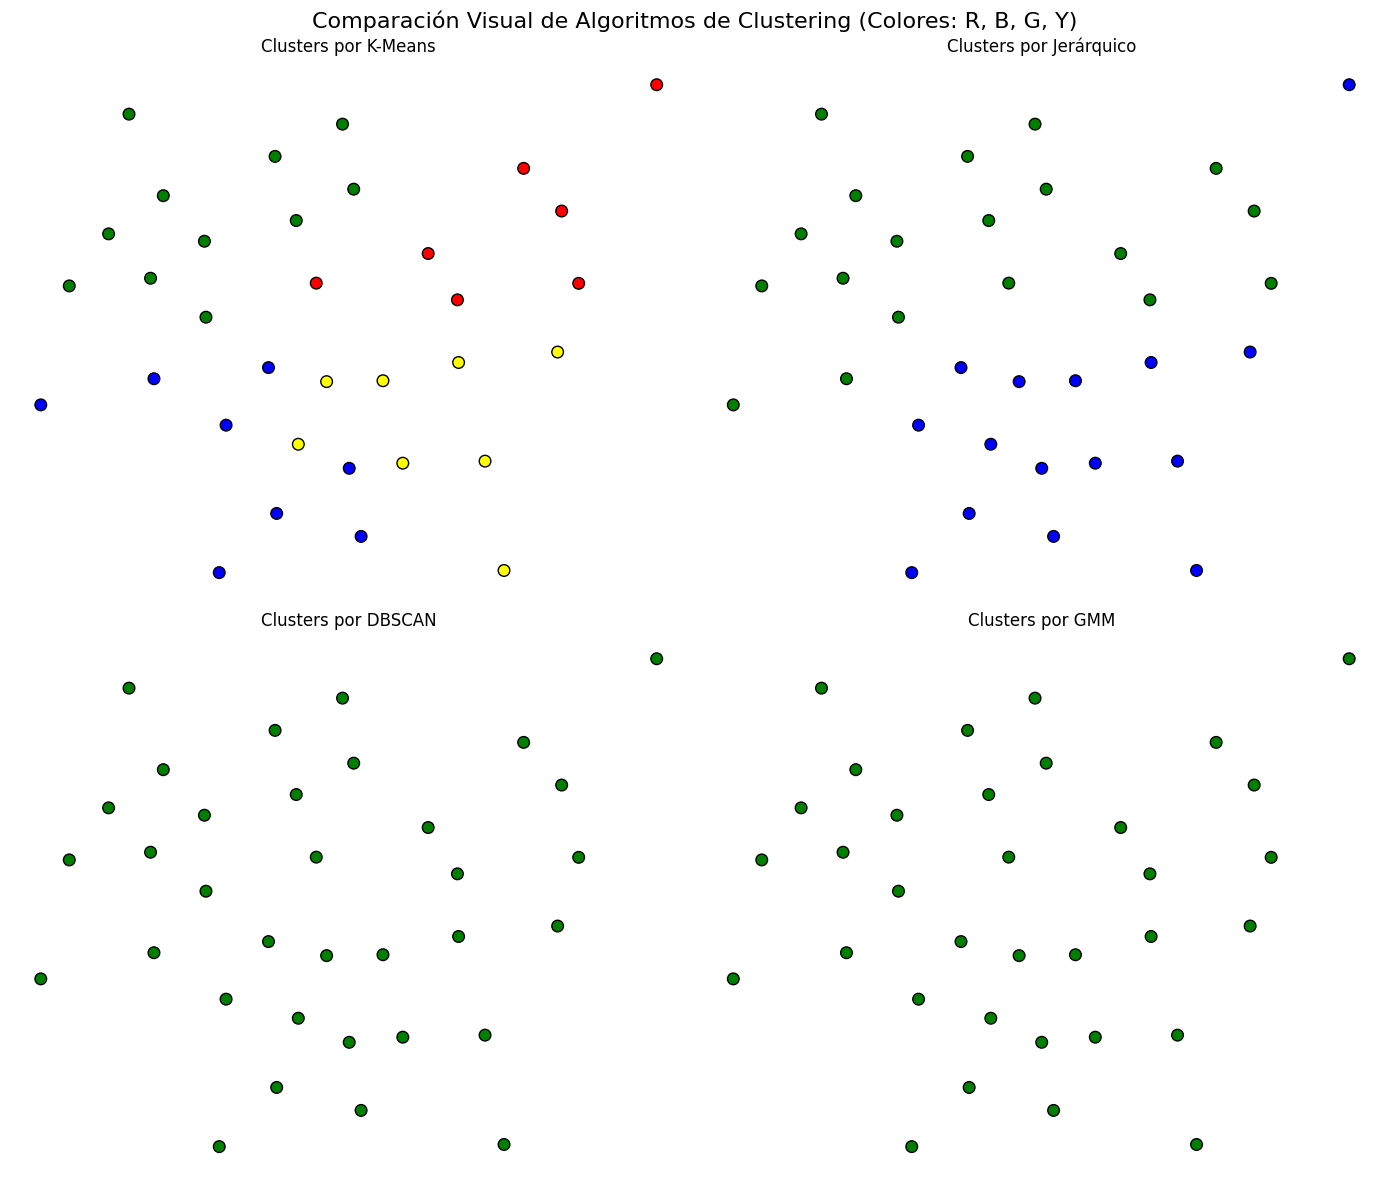

In [64]:
# Comparación Visual de Algoritmos:
# Crea una figura con cuatro subplots para comparar los resultados de los cuatro algoritmos.
# Para cada algoritmo, genera un gráfico de dispersión usando las coordenadas de longitud y latitud.
# Codifica los clusters mediante colores usando diferentes mapas de colores para cada algoritmo.
# Añade barras de color, títulos y etiquetas apropiadas.
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

algoritmos = ['kmeans_cluster', 'agg_cluster', 'dbscan_cluster', 'gmm_cluster']
titulos = ['K-Means', 'Jerárquico', 'DBSCAN', 'GMM']
colores = ['red', 'blue', 'green', 'yellow']

for ax, algoritmo, titulo in zip(axes.flat, algoritmos, titulos):
    labels = comuna_scaled[algoritmo]
    clusters_unicos = sorted(labels.unique())

    mapa_colores = {cluster: colores[i % len(colores)] 
                    for i, cluster in enumerate(clusters_unicos)}

    colores = labels.map(mapa_colores)

    scatter = ax.scatter(comuna_scaled['longitud'], comuna_scaled['latitud'],
                         c=colores, edgecolor='black', s=70)
    ax.set_title(f'Clusters por {titulo}', fontsize=12)
    ax.axis('off')

plt.suptitle('Comparación Visual de Algoritmos de Clustering (Colores: R, B, G, Y)', fontsize=16)
plt.tight_layout()
plt.show()

# 3.3 Fusión con Datos Geoespaciales y Visualización en Mapa

**Objetivo:** Visualizar los resultados de los algoritmos de clustering en mapas geoespaciales de Santiago.

**Instrucciones:**

## Preparación de datos para fusión:

- Crea una copia del DataFrame `comuna_grouped` llamada `comuna_geo`.


## Fusión con datos geoespaciales:

- Combina el DataFrame `df_stgo_norm` con `comuna_geo` usando una fusión izquierda (left join).
- Realiza la fusión utilizando las columnas 'NOM_COM' de `df_stgo_norm` y 'comuna' de `comuna_geo`.
- Almacena el resultado en `df_stgo_merged`.


## Visualización de resultados en mapas:

- Crea una figura con cuatro subplots organizados en una matriz 2x2.
- Para cada algoritmo (K-Means, Clustering Jerárquico, DBSCAN, GMM):

    - Genera un mapa de las comunas de Santiago coloreado según la asignación de clusters.
    - Añade una leyenda con la etiqueta correspondiente al algoritmo.
    - Establece un título descriptivo.
    - Elimina los ejes para mejorar la visualización del mapa.


**Resultado esperado:** Un panel de cuatro mapas que muestran la segmentación urbana de Santiago según los diferentes algoritmos de clustering, permitiendo una comparación visual de los patrones espaciales identificados por cada método.

In [65]:
# Crear una copia del DataFrame comuna_grouped
comuna_geo = comuna_grouped.copy()

In [66]:
# Fusión con datos geoespaciales:
comuna_grouped['kmeans_cluster'] = comuna_scaled['kmeans_cluster']
comuna_grouped['agg_cluster'] = comuna_scaled['agg_cluster']
comuna_grouped['dbscan_cluster'] = comuna_scaled['dbscan_cluster']
comuna_grouped['gmm_cluster'] = comuna_scaled['gmm_cluster']

comuna_geo = comuna_grouped.copy()

# Combina el DataFrame `df_stgo_norm` con `comuna_geo` usando una fusión izquierda (left join).
# Realiza la fusión utilizando las columnas 'NOM_COM' de `df_stgo_norm` y 'comuna' de `comuna_geo`.
# Almacena el resultado en `df_stgo_merged`.
df_stgo_merged = df_stgo_norm.merge(comuna_geo, how='left', left_on='NOM_COM', right_on='comuna')

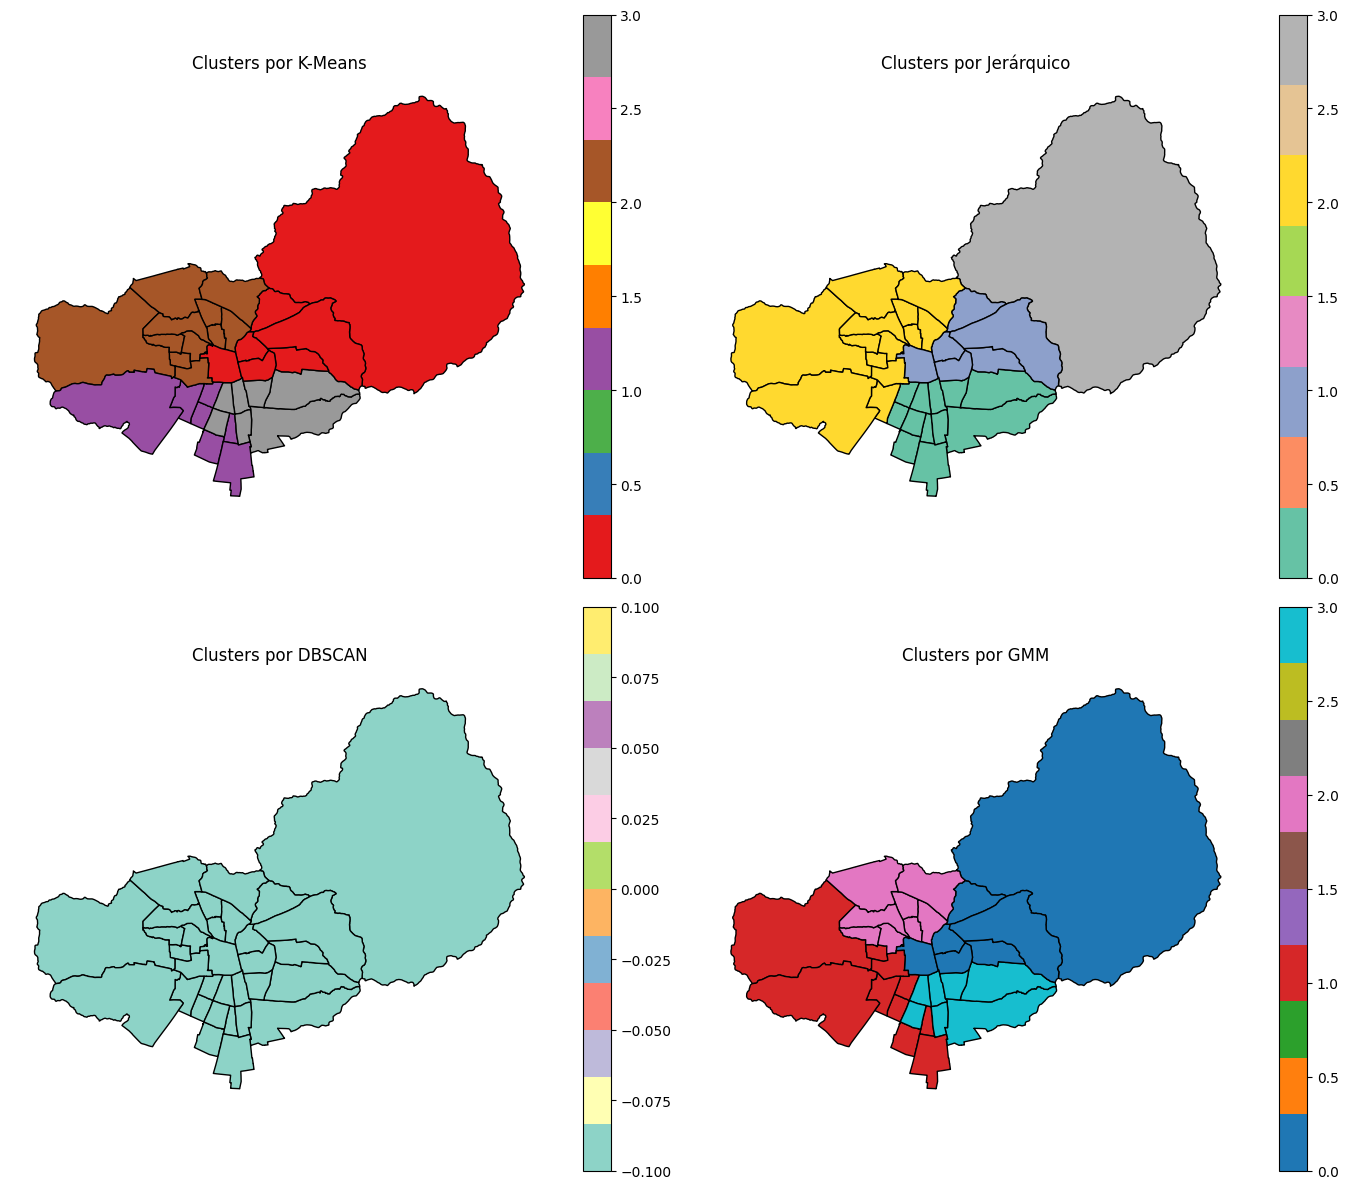

In [67]:
# ## Visualización de resultados en mapas:
# Crea una figura con cuatro subplots organizados en una matriz 2x2.
# Para cada algoritmo (K-Means, Clustering Jerárquico, DBSCAN, GMM):
# Genera un mapa de las comunas de Santiago coloreado según la asignación de clusters.
# Añade una leyenda con la etiqueta correspondiente al algoritmo.
# Establece un título descriptivo.
# Elimina los ejes para mejorar la visualización del mapa.
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

algoritmos = ['kmeans_cluster', 'agg_cluster', 'dbscan_cluster', 'gmm_cluster']
titulos = ['K-Means', 'Jerárquico', 'DBSCAN', 'GMM']
colores = ['Set1', 'Set2', 'Set3', 'tab10']

for ax, algoritmo, titulo, cmap in zip(axes.flat, algoritmos, titulos, colores):
    df_stgo_merged.plot(column=algoritmo, 
                        ax=ax, 
                        legend=True, 
                        cmap=cmap,
                        edgecolor='black')
    
    ax.set_title(f'Clusters por {titulo}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Parte 4: Análisis de NSE por Cluster

En esta cuarta parte del taller, analizarás la relación entre los clusters identificados y el nivel socioeconómico (NSE) de las comunas de Santiago. Realizarás un análisis estadístico y crearás visualizaciones para comprender mejor los patrones socioeconómicos captados por el algoritmo de clustering.

# 4.1 Caracterización de Clusters

**Objetivo:** Analizar y visualizar las características de nivel socioeconómico de cada cluster para comprender los patrones de segregación socioeconómica en Santiago.

**Instrucciones:**

## Análisis estadístico de NSE por cluster con K-Means:

- Utiliza el método `groupby` para agrupar los datos del DataFrame `comuna_grouped` por la columna 'kmeans_cluster'.
- Calcula las siguientes estadísticas para la variable 'nse' en cada cluster:

    - Media (mean)
    - Desviación estándar (std)
    - Valor mínimo (min)
    - Valor máximo (max)
    - Número de comunas (count)


- Almacena los resultados en un DataFrame llamado `cluster_stats`.
- Muestra el DataFrame `cluster_stats`.


## Visualización de la distribución de NSE por cluster:

- Generar un boxplot que muestre la distribución del NSE en cada cluster.
- Configura el eje X para representar los clusters ('kmeans_cluster') y el eje Y para el nivel socioeconómico ('nse').
- Añade un título y etiqueta los ejes.
- Agrega una cuadrícula.
- Muestra la visualización.


## Creación de un mapa de calor de NSE por comuna:

- Utiliza el método plot del DataFrame `df_stgo_merged` para generar un mapa coroplético que visualice el NSE promedio por comuna.
- Utiliza un mapa de colores adecuado para representar los valores de NSE.
- Incluye una leyenda, un título, elimina los ejes y muestra la visualización.


Estos resultados te permitirán interpretar cómo el algoritmo K-Means ha capturado los patrones de segregación socioeconómica en Santiago y cómo se distribuyen espacialmente estos patrones.

In [68]:
# Análisis estadístico de NSE por cluster con K-Means:
# Utiliza el método `groupby` para agrupar los datos del DataFrame `comuna_grouped` por la columna 'kmeans_cluster'.
# Calcula las siguientes estadísticas para la variable 'nse' en cada cluster:
# Media (mean)
# Desviación estándar (std)
# Valor mínimo (min)
# Valor máximo (max)
# Número de comunas (count)
# Almacena los resultados en un DataFrame llamado `cluster_stats`.
comuna_grouped['kmeans_cluster'] = comuna_scaled['kmeans_cluster']

# Agrupar por cluster y calcular estadísticas del NSE
cluster_stats = comuna_grouped.groupby('kmeans_cluster')['nse'].agg(
    mean='mean',
    std='std',
    min='min',
    max='max',
    count='count'
).reset_index()

# Muestra el DataFrame `cluster_stats`.
cluster_stats

,kmeans_cluster,mean,std,min,max,count
0,0,80.319844,9.852929,64.713062,92.206642,7
1,1,28.417931,12.915449,12.644989,49.320908,8
2,2,35.994187,10.406958,20.584083,53.602546,11
3,3,43.730508,9.475864,30.916561,59.559851,8


C:\Users\nelso\AppData\Local\Temp\ipykernel_8648\2978100215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comuna_grouped, x='kmeans_cluster', y='nse', palette='Set2')


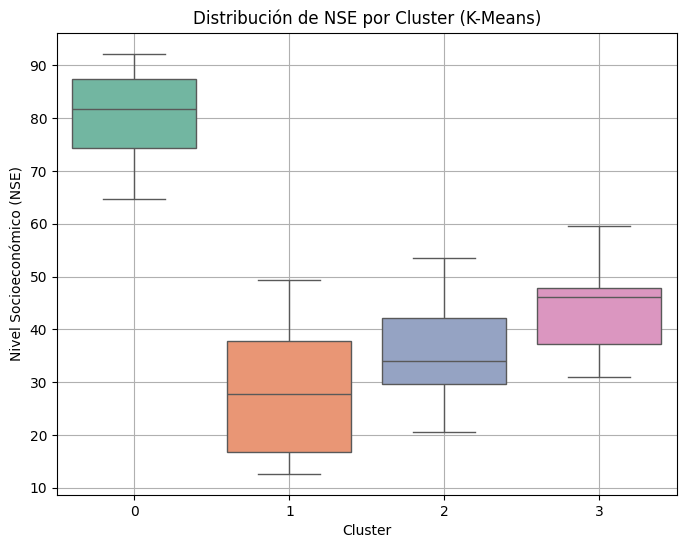

In [69]:
# Visualización de la distribución de NSE por cluster:
# Generar un boxplot que muestre la distribución del NSE en cada cluster.
# Configura el eje X para representar los clusters ('kmeans_cluster') y el eje Y para el nivel socioeconómico ('nse').
# Añade un título y etiqueta los ejes.
# Agrega una cuadrícula.
# Muestra la visualización.
plt.figure(figsize=(8, 6))
sns.boxplot(data=comuna_grouped, x='kmeans_cluster', y='nse', palette='Set2')
plt.title("Distribución de NSE por Cluster (K-Means)")
plt.xlabel("Cluster")
plt.ylabel("Nivel Socioeconómico (NSE)")
plt.grid(True)
plt.show()

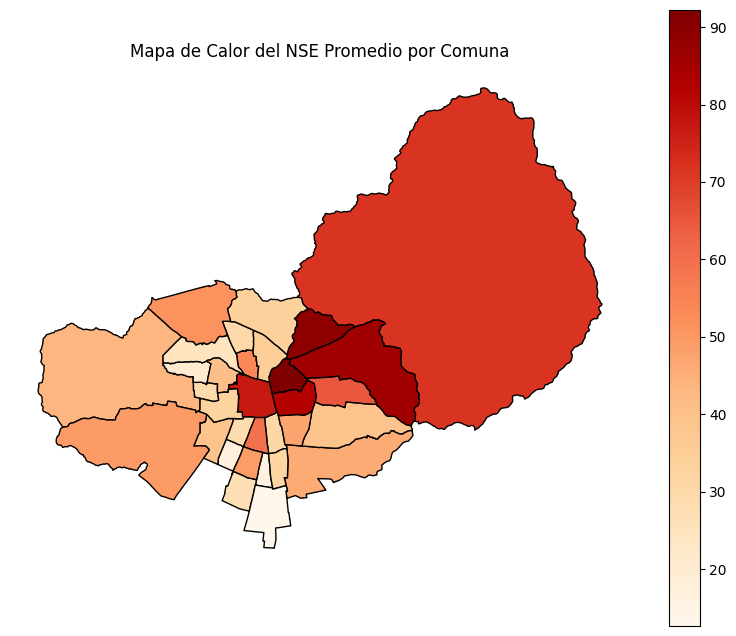

In [70]:
# Creación de un mapa de calor de NSE por comuna:
# Utiliza el método plot del DataFrame `df_stgo_merged` para generar un mapa coroplético que visualice el NSE promedio por comuna.
# Utiliza un mapa de colores adecuado para representar los valores de NSE.
# Incluye una leyenda, un título, elimina los ejes y muestra la visualización.
df_stgo_merged.plot(column='nse', cmap='OrRd', legend=True, edgecolor='black', figsize=(10, 8))
plt.title("Mapa de Calor del NSE Promedio por Comuna")
plt.axis('off')
plt.show()

# Parte 5: Reducción de Dimensionalidad y Visualización Avanzada

En esta quinta parte del taller, aplicarás técnicas de reducción de dimensionalidad para visualizar de manera más efectiva los patrones multidimensionales presentes en los datos. Utilizarás PCA (Análisis de Componentes Principales) para una reducción lineal y UMAP para una proyección no lineal.

# 5.1 Análisis de Componentes Principales (PCA)

**Objetivo:** Reducir la dimensionalidad de los datos mediante PCA y visualizar los resultados en relación con los clusters identificados y el nivel socioeconómico.

**Instrucciones:**

## Aplicación de PCA:

- Crea un objeto PCA configurado para extraer 2 componentes principales.
- Aplica PCA a los datos estandarizados (`comuna_scaled[features]`) utilizando el método `fit_transform`.
- Almacena el resultado de la transformación en una variable llamada `comuna_pca`.


## Creación de DataFrame con resultados de PCA:

- Genera un nuevo DataFrame llamado `pca_df` que incluya:

    - Los nombres de las comunas.
    - Las coordenadas en el espacio PCA (PC1 y PC2).
    - Las asignaciones de clusters para cada algoritmo (K-Means, Jerárquico, DBSCAN y GMM).
    - Los valores de NSE originales.




## Visualización de resultados PCA:

- Crea una figura con 4 subplots organizados en una matriz 2x2.
- En cada subplot, genera un gráfico de dispersión con las coordenadas PC1 y PC2, donde:

    - Primer subplot: Colorea los puntos según los clusters de K-Means con la paleta 'viridis'.
    - Segundo subplot: Colorea los puntos según los clusters jerárquicos con la paleta 'plasma'.
    - Tercer subplot: Colorea los puntos según los clusters de DBSCAN con la paleta 'cividis'.
    - Cuarto subplot: Colorea los puntos según el valor de NSE con la paleta 'RdYlBu_r'.


- Configura títulos adecuados para cada gráfico.
- Añade cuadrículas suaves a cada gráfico.


## Análisis de varianza explicada:

- Extrae los ratios de varianza explicada del objeto PCA.
- Imprime la varianza explicada por PC1 con 4 decimales.
- Imprime la varianza explicada por PC2 con 4 decimales.
- Calcula e imprime la varianza acumulada (suma de las dos componentes).


## Visualización de contribución de variables:

- Crea un DataFrame con los componentes principales, donde las filas son los componentes y las columnas son las variables originales.
- Genera un mapa de calor que muestre la contribución de cada variable original a cada componente principal.
- Configura el mapa para mostrar los valores exactos dentro de cada celda.
- Añade un título descriptivo.



**Resultado esperado:** Una serie de visualizaciones que te permitirán entender cómo se proyectan los datos en un espacio bidimensional mediante PCA, cómo se relacionan los clusters con esta proyección, y qué variables originales contribuyen más a cada componente principal.

In [71]:
# Aplicación de PCA:
# Crea un objeto PCA configurado para extraer 2 componentes principales.
# Aplica PCA a los datos estandarizados (`comuna_scaled[features]`) utilizando el método `fit_transform`.
# Almacena el resultado de la transformación en una variable llamada `comuna_pca`.

pca = PCA(n_components=2)
comuna_pca = pca.fit_transform(comuna_scaled[features])

In [72]:
#  Creación de DataFrame con resultados de PCA:
# Genera un nuevo DataFrame llamado `pca_df` que incluya:
# Los nombres de las comunas.
# Las coordenadas en el espacio PCA (PC1 y PC2).
# Las asignaciones de clusters para cada algoritmo (K-Means, Jerárquico, DBSCAN y GMM).
# Los valores de NSE originales.
pca_df = pd.DataFrame(comuna_pca, columns=['PC1', 'PC2'])
pca_df['comuna'] = comuna_scaled['comuna']
pca_df['nse'] = comuna_scaled['nse']
pca_df['kmeans'] = comuna_scaled['kmeans_cluster']
pca_df['agg'] = comuna_scaled['agg_cluster']
pca_df['dbscan'] = comuna_scaled['dbscan_cluster']
pca_df['gmm'] = comuna_scaled['gmm_cluster']


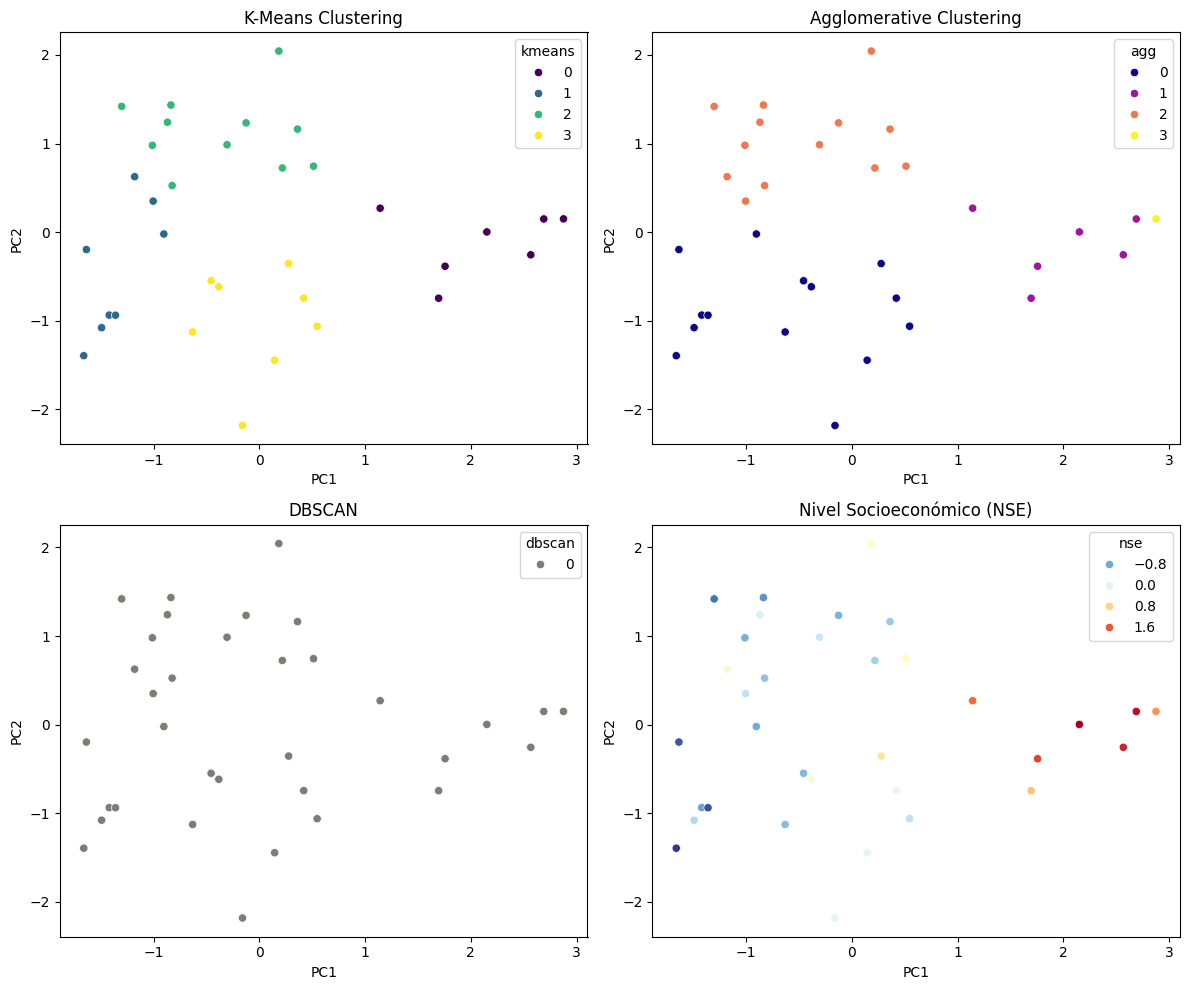

In [73]:
# Visualización de resultados PCA:
# Crea una figura con 4 subplots organizados en una matriz 2x2.
# En cada subplot, genera un gráfico de dispersión con las coordenadas PC1 y PC2, donde:
# Primer subplot: Colorea los puntos según los clusters de K-Means con la paleta 'viridis'.
# Segundo subplot: Colorea los puntos según los clusters jerárquicos con la paleta 'plasma'.
# Tercer subplot: Colorea los puntos según los clusters de DBSCAN con la paleta 'cividis'.
# Cuarto subplot: Colorea los puntos según el valor de NSE con la paleta 'RdYlBu_r'.
# Configura títulos adecuados para cada gráfico.
# Añade cuadrículas suaves a cada gráfico.

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# KMeans
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('K-Means Clustering')

# Agglomerative
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='agg', palette='plasma', ax=ax[0, 1])
ax[0, 1].set_title('Agglomerative Clustering')

# DBSCAN
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='dbscan', palette='cividis', ax=ax[1, 0])
ax[1, 0].set_title('DBSCAN')

# NSE continuo
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='nse', palette='RdYlBu_r', ax=ax[1, 1])
ax[1, 1].set_title('Nivel Socioeconómico (NSE)')

plt.tight_layout()
plt.show()

In [74]:
# Análisis de varianza explicada:
# Extrae los ratios de varianza explicada del objeto PCA.
# Imprime la varianza explicada por PC1 con 4 decimales.
# Imprime la varianza explicada por PC2 con 4 decimales.
# Calcula e imprime la varianza acumulada (suma de las dos componentes).
print("Varianza explicada PC1:", round(pca.explained_variance_ratio_[0]*100, 4), "%")
print("Varianza explicada PC2:", round(pca.explained_variance_ratio_[1]*100, 4), "%")


Varianza explicada PC1: 54.4074 %
Varianza explicada PC2: 32.2223 %


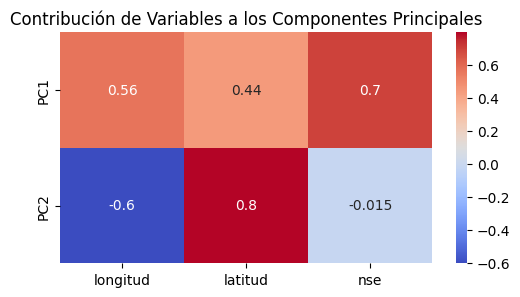

In [75]:
#  Visualización de contribución de variables:
# Crea un DataFrame con los componentes principales, donde las filas son los componentes y las columnas son las variables originales.
componentes = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
componentes.T

# Genera un mapa de calor que muestre la contribución de cada variable original a cada componente principal.
# Configura el mapa para mostrar los valores exactos dentro de cada celda.
# Añade un título descriptivo.
plt.figure(figsize=(6, 3))
sns.heatmap(componentes, annot=True, cmap='coolwarm')
plt.title('Contribución de Variables a los Componentes Principales')
plt.show()


# 5.2 Aplicación de UMAP para Visualización No Lineal

**Objetivo:** Aplicar la técnica UMAP (Uniform Manifold Approximation and Projection) para obtener una proyección no lineal de los datos y visualizar patrones que podrían no ser evidentes con métodos lineales como PCA.

**Instrucciones:**

## Aplicación de UMAP:

- Crea un objeto UMAP con una semilla para garantizar reproducibilidad.
- Aplica UMAP a los datos estandarizados (`comuna_scaled[features]`) utilizando el método `fit_transform`.
- Almacena el resultado de la transformación en una variable llamada `embedding`.


## Creación de DataFrame con resultados de UMAP:

- Genera un nuevo DataFrame llamado `umap_df` que incluya:

    - Los nombres de las comunas.
    - Las coordenadas en el espacio UMAP (UMAP1 y UMAP2).
    - Las asignaciones de clusters para cada algoritmo.
    - Los valores de NSE originales.




## Visualización de resultados UMAP:

- Crea una figura con 4 subplots organizados en una matriz 2x2.
- En cada subplot, genera un gráfico de dispersión con las coordenadas UMAP1 y UMAP2, donde:

    - Primer subplot: Colorea los puntos según los clusters de K-Means.
    - Segundo subplot: Colorea los puntos según los clusters jerárquicos.
    - Tercer subplot: Colorea los puntos según los clusters de DBSCAN.
    - Cuarto subplot: Colorea los puntos según el valor de NSE.


- Utiliza las mismas paletas de colores que en las visualizaciones de PCA.
- Configura títulos adecuados para cada gráfico.
- Añade cuadrículas suaves a cada gráfico.



**Resultado esperado:** Una serie de visualizaciones que te permitirán comparar cómo se proyectan los datos usando UMAP frente a PCA. UMAP suele preservar mejor la estructura local de los datos, lo que puede revelar agrupaciones que no son evidentes con PCA. Estas visualizaciones te ayudarán a evaluar la coherencia de los resultados de clustering y su relación con el nivel socioeconómico.

In [76]:
from umap import UMAP

# Crea un objeto UMAP con una semilla para garantizar reproducibilidad.
reducer = UMAP(n_components=2, random_state=42)

# Aplica UMAP a los datos estandarizados (`comuna_scaled[features]`) utilizando el método `fit_transform`.
# Almacena el resultado de la transformación en una variable llamada `embedding`.
embedding = reducer.fit_transform(comuna_scaled[features])

c:\Users\nelso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nelso\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [77]:
# Genera un nuevo DataFrame llamado `umap_df` que incluya:
# Los nombres de las comunas.
# Las coordenadas en el espacio UMAP (UMAP1 y UMAP2).
# Las asignaciones de clusters para cada algoritmo.
# Los valores de NSE originales.
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
umap_df['comuna'] = comuna_scaled['comuna']
umap_df['nse'] = comuna_scaled['nse']
umap_df['kmeans'] = comuna_scaled['kmeans_cluster']
umap_df['agg'] = comuna_scaled['agg_cluster']
umap_df['dbscan'] = comuna_scaled['dbscan_cluster']
umap_df['gmm'] = comuna_scaled['gmm_cluster']

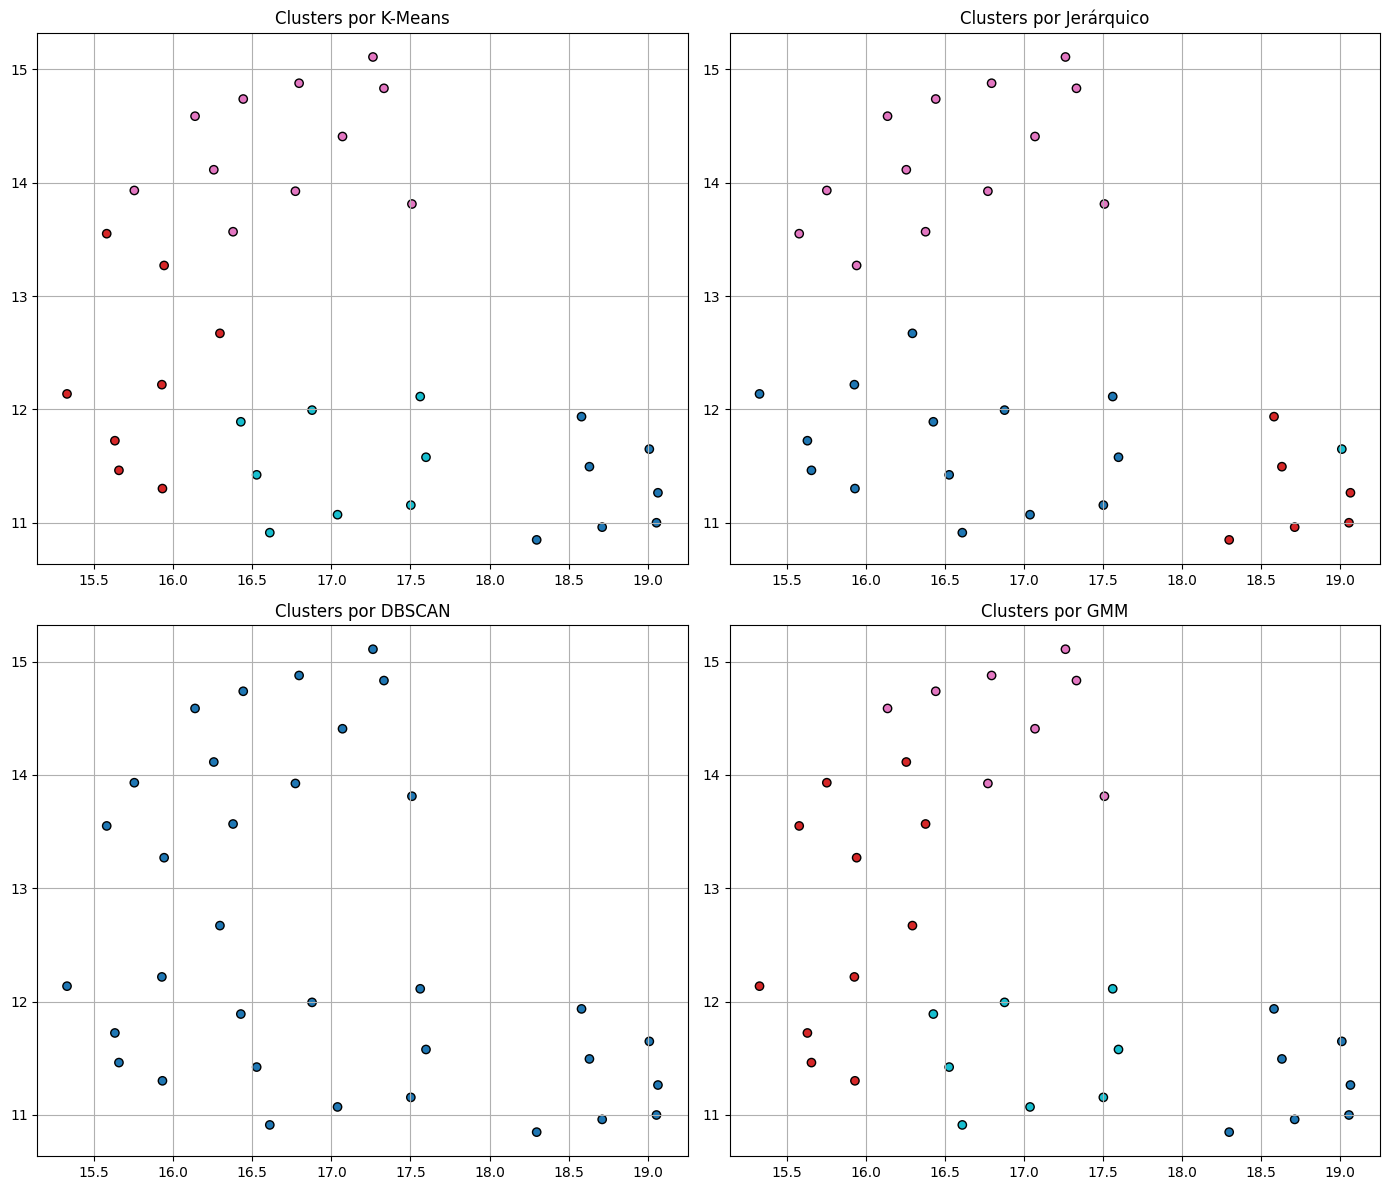

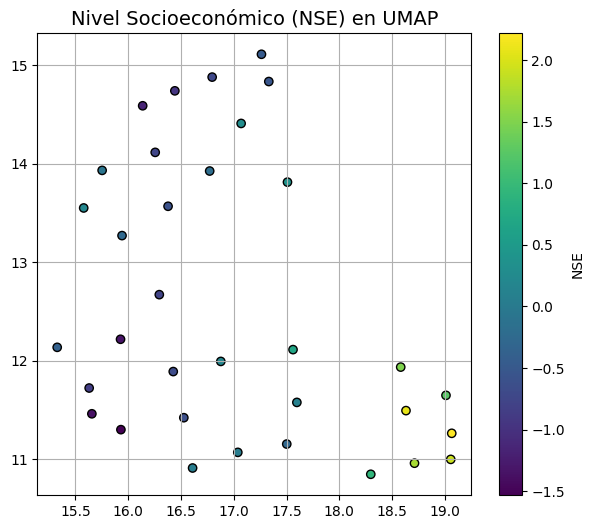

In [78]:
# Crea una figura con 4 subplots organizados en una matriz 2x2.
# En cada subplot, genera un gráfico de dispersión con las coordenadas UMAP1 y UMAP2, donde:
# Primer subplot: Colorea los puntos según los clusters de K-Means.
# Segundo subplot: Colorea los puntos según los clusters jerárquicos.
# Tercer subplot: Colorea los puntos según los clusters de DBSCAN.
# Cuarto subplot: Colorea los puntos según el valor de NSE.
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
algoritmos = ['kmeans', 'agg', 'dbscan', 'gmm']
titulos = ['K-Means', 'Jerárquico', 'DBSCAN', 'GMM']
colores = ['red', 'blue', 'green', 'purple']

for ax, algoritmo, titulo, color in zip(axes.flat, algoritmos, titulos, colores):
    scatter = ax.scatter(umap_df['UMAP1'], umap_df['UMAP2'], 
                         c=umap_df[algoritmo], cmap='tab10', edgecolor='black')
    ax.set_title(f'Clusters por {titulo}', fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()

# Utiliza las mismas paletas de colores que en las visualizaciones de PCA.
# Configura títulos adecuados para cada gráfico.
# Añade cuadrículas suaves a cada gráfico.
plt.figure(figsize=(7, 6))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['nse'], cmap='viridis', edgecolor='black')
plt.title('Nivel Socioeconómico (NSE) en UMAP', fontsize=14)
plt.colorbar(label='NSE')
plt.grid(True)
plt.show()


# Parte 6: Análisis Geoespacial Integrado con Riqueza Urbana

En esta sección final, integraremos todos los elementos de los análisis anteriores para crear visualizaciones avanzadas que combinen datos geoespaciales con indicadores de riqueza urbana.

# 6.1 Análisis de Hot Spots de Riqueza

**Objetivo:** Desarrollar un mapa de calor que muestre visualmente las concentraciones de riqueza en la ciudad de Santiago, utilizando técnicas de estimación de densidad kernel (KDE).

**Instrucciones:**

- Cree una figura de matplotlib con un tamaño adecuado.
- Como capa base, represente gráficamente el dataframe `df_stgo_merged` con un color de fondo claro y bordes visibles.
- Para la capa de mapa de calor:

    - Extraiga las coordenadas (longitud y latitud) del dataframe `df_barrio`.
    - Use el nivel socioeconómico (nse) como pesos para el análisis de densidad.
    - Implemente una estimación de densidad kernel usando `scipy.stats.gaussian_kde`.
    - Ordene los puntos por densidad para una mejor visualización.
    - Cree un gráfico de dispersión con los puntos coloreados según su densidad usando un mapa de colores adecuado.


- Añada una barra de colores al gráfico que indique la densidad de riqueza.
- Agregue un título apropiado al gráfico y configure el diseño para una presentación óptima.
- Desactive los ejes para mejorar la apariencia visual del mapa.
- Muestre el mapa resultante.

**Resultado esperado:** Un mapa de calor interactivo que resalte visualmente las áreas de Santiago con mayor concentración de riqueza, permitiendo identificar patrones espaciales de desigualdad socioeconómica.

Recomendación: Para una visualización efectiva, experimente con diferentes mapas de colores y niveles de transparencia (alpha) hasta encontrar una representación visual que destaque claramente los hot spots de riqueza.

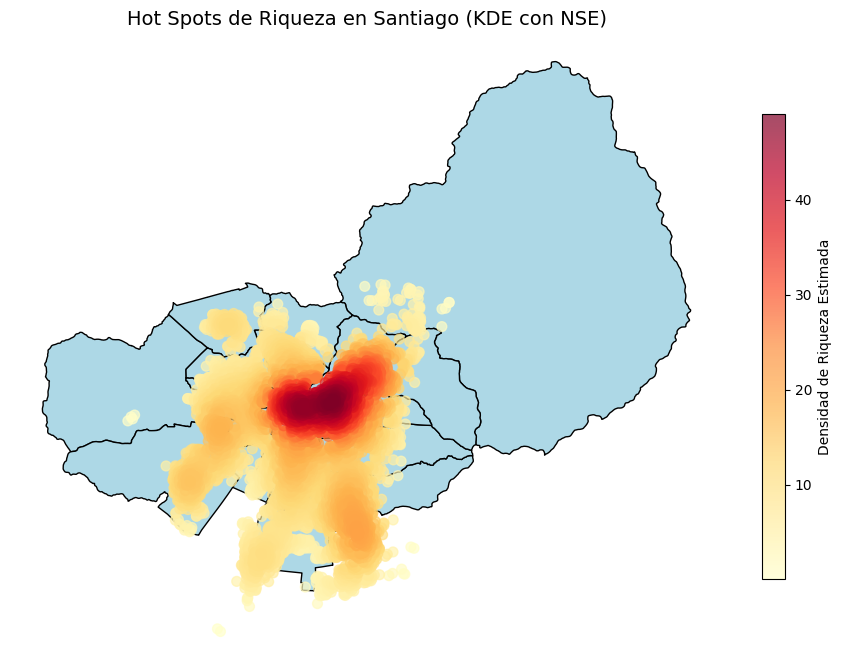

In [79]:
# Cree una figura de matplotlib con un tamaño adecuado.
fig, ax = plt.subplots(figsize=(10, 10))

# Como capa base, represente gráficamente el dataframe `df_stgo_merged` con un color de fondo claro y bordes visibles.
df_stgo_merged.plot(ax=ax, color='lightblue', edgecolor='black')

#Para la capa de mapa de calor:
# Extraiga las coordenadas (longitud y latitud) del dataframe `df_barrio`.
# Use el nivel socioeconómico (nse) como pesos para el análisis de densidad.
# Implemente una estimación de densidad kernel usando `scipy.stats.gaussian_kde`.
# Ordene los puntos por densidad para una mejor visualización.
# Cree un gráfico de dispersión con los puntos coloreados según su densidad usando un mapa de colores adecuado.
x = df_barrio['longitud'].values
y = df_barrio['latitud'].values

nse = df_barrio['nse'].values
coords = np.vstack([x, y])

from scipy.stats import gaussian_kde
kde = gaussian_kde(coords, weights=nse)
densidad = kde(coords)

idx = densidad.argsort()
x_sorted, y_sorted, dens_sorted = x[idx], y[idx], densidad[idx]

scatter = ax.scatter(
    x_sorted, y_sorted,
    c=dens_sorted,
    cmap='YlOrRd',
    s=50,
    alpha=0.7
)

# Añada una barra de colores al gráfico que indique la densidad de riqueza.
cbar = plt.colorbar(scatter, ax=ax, fraction=0.03)
cbar.set_label('Densidad de Riqueza Estimada')

# Agregue un título apropiado al gráfico y configure el diseño para una presentación óptima.
ax.set_title('Hot Spots de Riqueza en Santiago (KDE con NSE)', fontsize=14)

# Desactive los ejes para mejorar la apariencia visual del mapa.
ax.axis('off')

# Muestre el mapa resultante.
plt.show()

# Parte 7: Preguntas de Análisis

1. Análisis Sociourbano:

- ¿Es posible identificar sectores de concentración de riqueza en Santiago? ¿Qué comunas conforman estos sectores y qué características geoespaciales comparten?
- ¿Existe un patrón espacial claro en la distribución del nivel socioeconómico en Santiago? ¿Cómo se relaciona este patrón con la estructura urbana de la ciudad?
- Basándose en los resultados del clustering, ¿podría decirse que Santiago presenta segregación socioespacial? Justifique su respuesta con evidencia cuantitativa derivada de los análisis realizados.
- Si tuviera que dividir Santiago en exactamente 3 macrozonas socioeconómicas, ¿cuáles serían estas y qué características particulares tendría cada una?

2. Comparación de Algoritmos:

- ¿Qué diferencias fundamentales observa entre los resultados obtenidos con K-Means, Clustering Jerárquico, DBSCAN y GMM? ¿Cuál considera más adecuado para este análisis socioespacial y por qué?
- Analice críticamente las ventajas y limitaciones de cada algoritmo de clustering en el contexto específico de datos georreferenciados con componente socioeconómica.
- ¿Qué algoritmo logra mejor capturar la heterogeneidad interna de las comunas? Proporcione evidencia cuantitativa que respalde su respuesta.

3. Aplicaciones y Extensiones:

- Proponga una aplicación práctica de los resultados obtenidos en el ámbito de políticas públicas urbanas o planificación territorial.
- Si tuviera acceso a datos temporales del NSE para Santiago (por ejemplo, para los últimos 20 años), ¿qué análisis adicionales realizaría para estudiar la evolución de la segregación urbana?
- ¿Cómo podría incorporar información adicional (criminalidad, densidad poblacional, acceso a servicios, etc.) para enriquecer este análisis? Describa metodológicamente cómo lo haría.